# REDUCING COMMERCIAL AVIATION FATALITIES



# Overview

Most of the flight fatalities are caused due to Loss of Airplane State
Awareness of the pilot. So we have to build a model that can detect
troubling events from the Aircrew’s Physiological Data. This model should
help the pilots by alerting them when they are entering into a troubling state
thereby preventing accidents

# BUSINESS PROBLEM

Losing the Airplane State Awareness occurs during a very stressful
environment. In this stressful environment different pilots react differently
but all of them are trained in such a way that the passengers safety is of
utmost importance. So even small help can get the pilot on track.
The pilots can get into one of these 3 cognitive states under the distracting
events.

1) Channelized Attention (CA): The pilot is focussing only on 1 task and
excluding others.

2) Diverted Attention (DA): The state of having one’s attention diverted
by the actions or thought processes associated with a decision.

3) Startle/Surprised (SS): This is an involuntary reaction when something
unexpected happens.

So the model has to alert the pilot when he/she has entered one of the 3
states.

# ML Formulation

The evaluation factor is MULTI CLASS LOG LOSS between predicted
probabilities and Observed Target.
We need to predict for each id (particular crew at particular time), one of the
4 states (SS,CA,DA or Baseline) of the pilot. We have to strictly predict the
probability of occurrence of each event.

# Business Constraint
This is totally possible. So i dont find any business constraints.

# Dataset analysis

The 1.15 GB of Training Dataset consists of 3 categories CA,DA,SS.
The test dataset is of 4.46 GB and the output can be Baseline, CA, DA or SS.
The test data is taken from a flight simulator, where the experiment is called
LOFT -> Line Oriented Flight Training where the pilot is trained in a
simulator.
Our data has the ECG, EEG, GSR(Galvanic SKin Response) and Respiration
of the pilots.

Id: Unique identifier for crew+time combination. A pilot with a particular time
into the experiment is represented using an id. So for each id, we need to
predict the state.

Experiment: For training, it will be either CA or DA or SS. For testing, it will be LOFT.

Crew: Unique id for a pair or pilot

Time: Seconds into the experiment

Seat: Seat of the pilot- 0 means left, 1 means right.

EEG (Electroencephalogram) — This is the summation of all activities on the
surface of the brain. Data from 20 electrodes are given to us. Each electrode
lead is placed near a particular part of the brain ( prefrontal(fp), temporal(t),
frontal(f), parietal(p), occipital(o), central(c) ). The odd numbers in the representation indicate that the electrode is placed on the left side of the brain, even numbers indicate the right side, and z indicate the middle region.

Eeg_f7: Data from the electrode near the prefrontal portion — left side

Eeg_f8: Data from the electrode near the frontal area — right side

Eeg_t4: Data from the electrode near the temporal area — right side

Eeg_t6: Data from the electrode near the temporal area — right side

Eeg_t5: Data from the electrode near the temporal area — left side

Eeg_t3: Data from the electrode near the temporal area — left side

Eeg_fp2: Data from the electrode near the prefrontal area — right side

Eeg_o1: Data from the electrode near the occipital area — left side

Eeg_p3: Data from the electrode near the parietal area — left side

Eeg_pz: Data from the electrode near the parietal area — middle region

Eeg_f3: Data from the electrode near the frontal area — left side

Eeg_fz: Data from the electrode near the frontal area — middle region

Eeg_f4: Data from the electrode near the frontal area — right side

Eeg_c4: Data from the electrode near the central area — right side

Eeg_p4: Data from the electrode near the parietal area — right side

Eeg_poz: Data from the electrode near the parietal-occipital junction— Middle region

Eeg_c3: Data from the electrode near the central area — left side

Eeg_cz: Data from the electrode near the central area — middle region

Eeg_o2: Data from the electrode near the occipital area — right side

Ecg: Three-point electrocardiogram (ECG) signal — It measures the
electrical activity of the heart (sensor output is in microvolts)

R: Respiration sensor — It measures the rise and fall of the chest
(Sensor output is in microvolts)

Gsr: Galvanic skin response — The measure of electrodermal activity
(Sensor output is in microvolts)

Event: The output which is to be predicted — The state of the pilot at a
given time. It will be either baseline (A no event) or SS(B) or CA(C)or DA(D).

# Performance Metric

Our metric is Multiclass Log Loss between Predicted Probability and
Observed Target. This problem is a MULTICLASS CLASSIFICATION
PROBLEM where the #classes are 4.

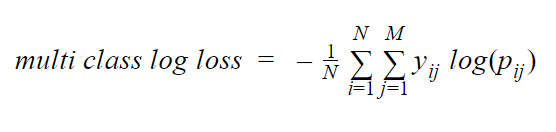

N = total number of data points

M =  the number of classes

yij is 1 if the data point i is predicted to be of class j else 0.

pij is the probability of datapoint i belonging to class j

# Research-Papers/Solutions/Architectures/Kernels

1. https://www.kaggle.com/stuartbman/introduction-to-physiological-data

This link helped me out to understand what is physiological data. What are all the features in the dataset. The 3 types of physiological data Respiration, EEG and ECG are explained there along with how to use the data for visualization. It also explained about the values of normal ones and how they waver when the person(here the pilot) is set into one of the stressful situations.
Eg: For EEG:
Delta (<4Hz) Slow wave sleep, continuous attention tasks
Theta (4-7Hz) Drowsiness, repression of elicited responses
Alpha (8-15Hz) Relaxed, eyes closed
Beta (16-31Hz) Active thinking, focus, alert
Gamma (>32Hz) Short term memory, cross sensory perception

2. https://medium.com/analytics-vidhya/reducing-commercial-aviation-fatalities-dataset-pipeline-b835d06be423

This blog helped me to understand:
That the data is imbalanced and to balance the data they used a technique called SMOTE(Synthetic Minority Oversampling TEchnique). This technique generates synthetic data for the minority class joining the points of the minority class with line segments and then places artificial points on these lines.
The order of Feature Importance for a LightGBM model.
The LightGBM is a fast, distributed, high-performance gradient boosting framework based on a decision tree algorithm, used for ranking, classification and many other machine learning tasks.

3. https://medium.com/swlh/reducing-commercial-aviation-fatalities-2257b5090d9f
4. https://atharvamusale.medium.com/reducing-commercial-aviation-fatalities-c335757e8d01

3 and 4 blogs helped me understand:
We can't just simply use one feature(ECG or EEG or GSR) and classify the event, we need all three of them.
We can use Dask since we have a large dataset.
Approaches to build a model which utilizes the least amount memory and their procedures.  

5. https://medium.com/analytics-vidhya/reducing-commercial-aviation-fatalities-ec338e37900c

This blog helped me understand: 
When the value of ECG is high (more than 10000 microvolts), the pilot is more likely to enter into the DA state.
When the ECG value is too negative, the pilot is likely to be in the CA state.
These data are clearly rich in noise and hence we need to remove this high-frequency noise. For that purpose, we use a low pass Butterworth filter.
For filtering the ECG signal, the cutoff frequency(w) was selected as 100 and for filtering the respiration signal, the value of w was taken as 0.7.
This data can be of so much help when we are designing the model.

# First Cut Approach

For EDA we use:
Violin Plots
Box PLots
Histograms
Std Deviation
Variance
Mean

I would like to Normalize using the MinMax feature so that the data exists between 0 and 1.
MinMax feature helps us scale and translate each feature individually such that it is in the given range on the training set, e.g. between zero and one.

We find that the data is Imbalanced so we use SMOTE to balance that data.
Models that don't have a balanced dataset turn out to give us poor performance.
SMOTE(Synthetic Minority Oversampling TEchnique) generates synthetic data for the minority class joining the points of the minority class with line segments and then places artificial points on these lines.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

We have a huge dataset so we better use DASK(like in Microsoft Malware case study) for better use of RAM.
Dask can efficiently perform parallel computations on a single machine using multi-core CPUs.
Dask can run on a cluster of machines to process data efficiently as it uses all the cores of the connected machines. One interesting fact here is that it is not necessary that all machines should have the same number of cores. If one system has 2 cores while the other has 4 cores, Dask can handle these variations internally.
The model I would like to try on this huge dataset is Light GBM.

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
Faster training speed and higher efficiency.
Lower memory usage.
Better accuracy.
Support of parallel and GPU learning.
Capable of handling large-scale data.

Generally XGBoost models have high performance rates, so we can try it.
The first reason to try XGBoost is that it has parallel processing which might groom itself easily through this huge dataset.
It has the capability to handle missing values
It provides cross validation
Logistic Regression 
It is less inclined to over fitting.
Simple to implement
Faster than many models.

# Exploratory Data Analysis on Data

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix 
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier

In [2]:
train = pd.read_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train.csv')
print('Number of data points : ', train.shape[0])
print('Number of features : ', train.shape[1])
print('Features : ', train.columns.values)
train.head()

Number of data points :  4867421
Number of features :  28
Features :  ['crew' 'experiment' 'time' 'seat' 'eeg_fp1' 'eeg_f7' 'eeg_f8' 'eeg_t4'
 'eeg_t6' 'eeg_t5' 'eeg_t3' 'eeg_fp2' 'eeg_o1' 'eeg_p3' 'eeg_pz' 'eeg_f3'
 'eeg_fz' 'eeg_f4' 'eeg_c4' 'eeg_p4' 'eeg_poz' 'eeg_c3' 'eeg_cz' 'eeg_o2'
 'ecg' 'r' 'gsr' 'event']


,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


# Checking datatypes and null/missing values in all the columns

In [3]:
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   crew        4867421 non-null  int64  
 1   experiment  4867421 non-null  object 
 2   time        4867421 non-null  float64
 3   seat        4867421 non-null  int64  
 4   eeg_fp1     4867421 non-null  float64
 5   eeg_f7      4867421 non-null  float64
 6   eeg_f8      4867421 non-null  float64
 7   eeg_t4      4867421 non-null  float64
 8   eeg_t6      4867421 non-null  float64
 9   eeg_t5      4867421 non-null  float64
 10  eeg_t3      4867421 non-null  float64
 11  eeg_fp2     4867421 non-null  float64
 12  eeg_o1      4867421 non-null  float64
 13  eeg_p3      4867421 non-null  float64
 14  eeg_pz      4867421 non-null  float64
 15  eeg_f3      4867421 non-null  float64
 16  eeg_fz      4867421 non-null  float64
 17  eeg_f4      4867421 non-null  float64
 18  eeg_c4      4867421 no

No null values in the train dataset.

In [9]:
kaggle_test.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 17965143 entries, 0 to 187048
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          17965143 non-null      int64
 1   crew        17965143 non-null      int64
 2   experiment  17965143 non-null      object
 3   time        17965143 non-null      float64
 4   seat        17965143 non-null      int64
 5   eeg_fp1     17965143 non-null      float64
 6   eeg_f7      17965143 non-null      float64
 7   eeg_f8      17965143 non-null      float64
 8   eeg_t4      17965143 non-null      float64
 9   eeg_t6      17965143 non-null      float64
10   eeg_t5      17965143 non-null      float64
11   eeg_t3      17965143 non-null      float64
12   eeg_fp2     17965143 non-null      float64
13   eeg_o1      17965143 non-null      float64
14   eeg_p3      17965143 non-null      float64
15   eeg_pz      17965143 non-null      float64
16   eeg_f3      17965143 non-null      float6

No null values in the test dataset.

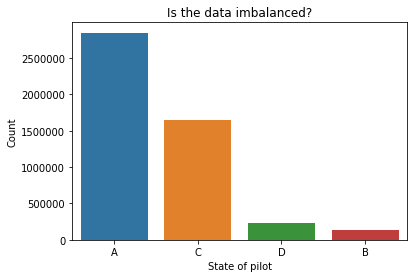

In [4]:
sns.countplot(train['event'])
plt.xlabel('State of pilot')
plt.ylabel('Count')
plt.title('Is the data imbalanced?')
plt.show()

# A=baseline/noevent
# B=SS
# C=CA
# D=DA

### 1) The data is totally imbalanced where, the number cases in A>>C>>D>B.
#### a) So we can say that major number of pilots are in a baseline state. 
#### b) Second most distraction case is that the pilots got into a Channelized Attention state (CA).
#### c) Third is the count where the pilots got into a Diverted Attention state (DA).
#### d) The least number of pilots got into a Startle/Surprise state.

#### 2) When it comes to physiological data we are given 3 parameters which are Respiration, Electrocardiogram(ECG) and Electroencephalogram(EEG). Lets have a look at them.
-------------------------------------------------------------------------------------------------------
# Respiration - R: Respiration sensor — It measures the rise and fall of the chest
(Sensor output is in microvolts)

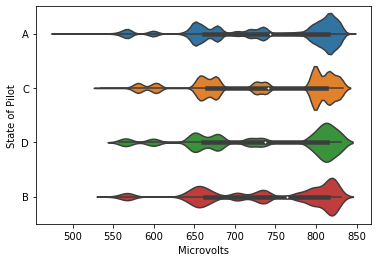

In [5]:
sns.violinplot(x='r', y='event',data= train)
plt.xlabel('Microvolts')
plt.ylabel('State of Pilot')
plt.show()

The majority of the situations occur at 650 microvolts and between 800-850 micro volts.
 In all the 4 situations, the 25th and 75th percentile did not change much.
 In all the 4 situations the histogram also look similar.
 The 50th percentile for the case B (Startle/Surprise) is at a higher voltage.

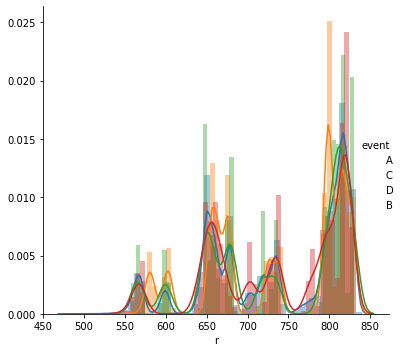

In [6]:
sns.FacetGrid(train, hue="event", size=5) \
   .add_legend() \
   .map(sns.distplot, "r"); 
plt.show();

The histograms overlapping too much and it is too congested to deduce a fact.

# Analyse the presence of noise in Respiration data

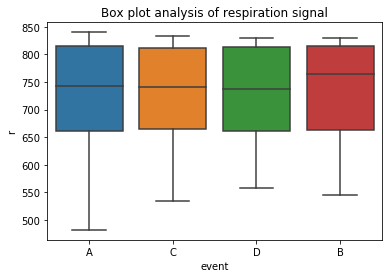

In [7]:
sns.boxplot(train["event"],train["r"])
plt.title("Box plot analysis of respiration signal")
plt.show()

Here also we do have outliers included in the data.

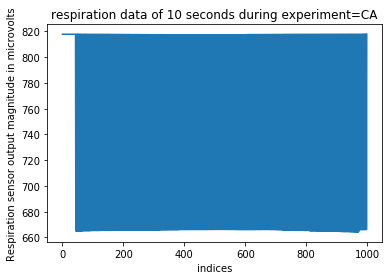

In [8]:
ca=train[train["experiment"]=="CA"]
ca.sort_values(by="time")

plt.plot(ca["r"][:1000])
plt.title("respiration data of 10 seconds during experiment=CA")
plt.xlabel("indices")
plt.ylabel("Respiration sensor output magnitude in microvolts")

plt.show()

Here we have plotted 'r' output for 10 seconds where the experiment is Channelized Attention. It is clearly visible that there is noise in the data.
The data collected is from the same situations as of CA so obviously SS and DA would also have noise.

## Electrocardiogram(ECG) - Ecg: Three-point electrocardiogram (ECG) signal — It measures the Electrical activity of the heart 
(sensor output is in microvolts)

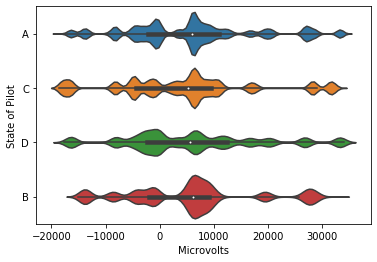

In [9]:
sns.violinplot(x='ecg', y='event',data= train)
plt.xlabel('Microvolts')
plt.ylabel('State of Pilot')
plt.show()

## The majority of the situations occur between -10k to 10k microvolts.

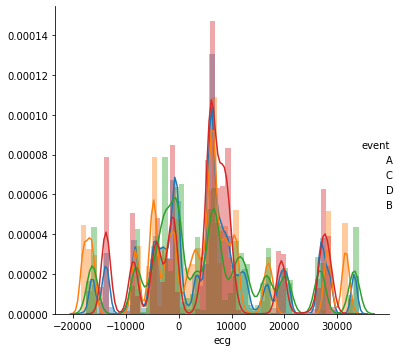

In [10]:
sns.FacetGrid(train, hue="event", size=5) \
   .add_legend() \
   .map(sns.distplot, "ecg"); 
plt.show();

The histograms overlapping too much and it is too congested to deduce a fact.

# Analysis of noise in the ECG data

In [11]:
#this is a code to find out the indices whre time is 10 seconds for CA experiment
ca=train[train["experiment"]=="CA"]
ca.sort_values(by="time")
ca["time"][:1000]

0       0.011719
1       0.015625
2       0.019531
3       0.023438
4       0.027344
         ...    
995    10.039062
996    10.042969
997    10.042969
998    10.046875
999    10.046875
Name: time, Length: 1000, dtype: float64

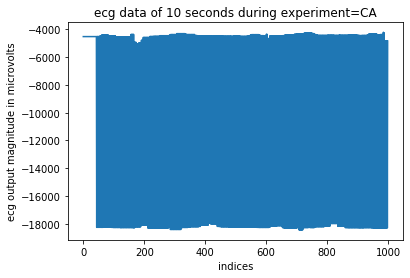

In [12]:
plt.plot(ca["ecg"][:1000])
plt.title("ecg data of 10 seconds during experiment=CA")
plt.xlabel("indices")
plt.ylabel("ecg output magnitude in microvolts")

plt.show()

Here we have plotted ECG output for 10 seconds where the experiment is Channelized Attention. It is clearly visible that there is noise in the data.
The data collected is from the same situations as of CA so obviously SS and DA would also have noise.

# EEG (Electroencephalogram) — This is the summation of all activities on the surface of the brain. Data from 20 electrodes are given to us. Each electrode lead is placed near a particular part of the brain ( prefrontal(fp), temporal(t), frontal(f), parietal(p), occipital(o), central(c) ). The odd numbers in the representation indicate that the electrode is placed on the left side of thebrain, even numbers indicate the right side, and z indicate the middle region.

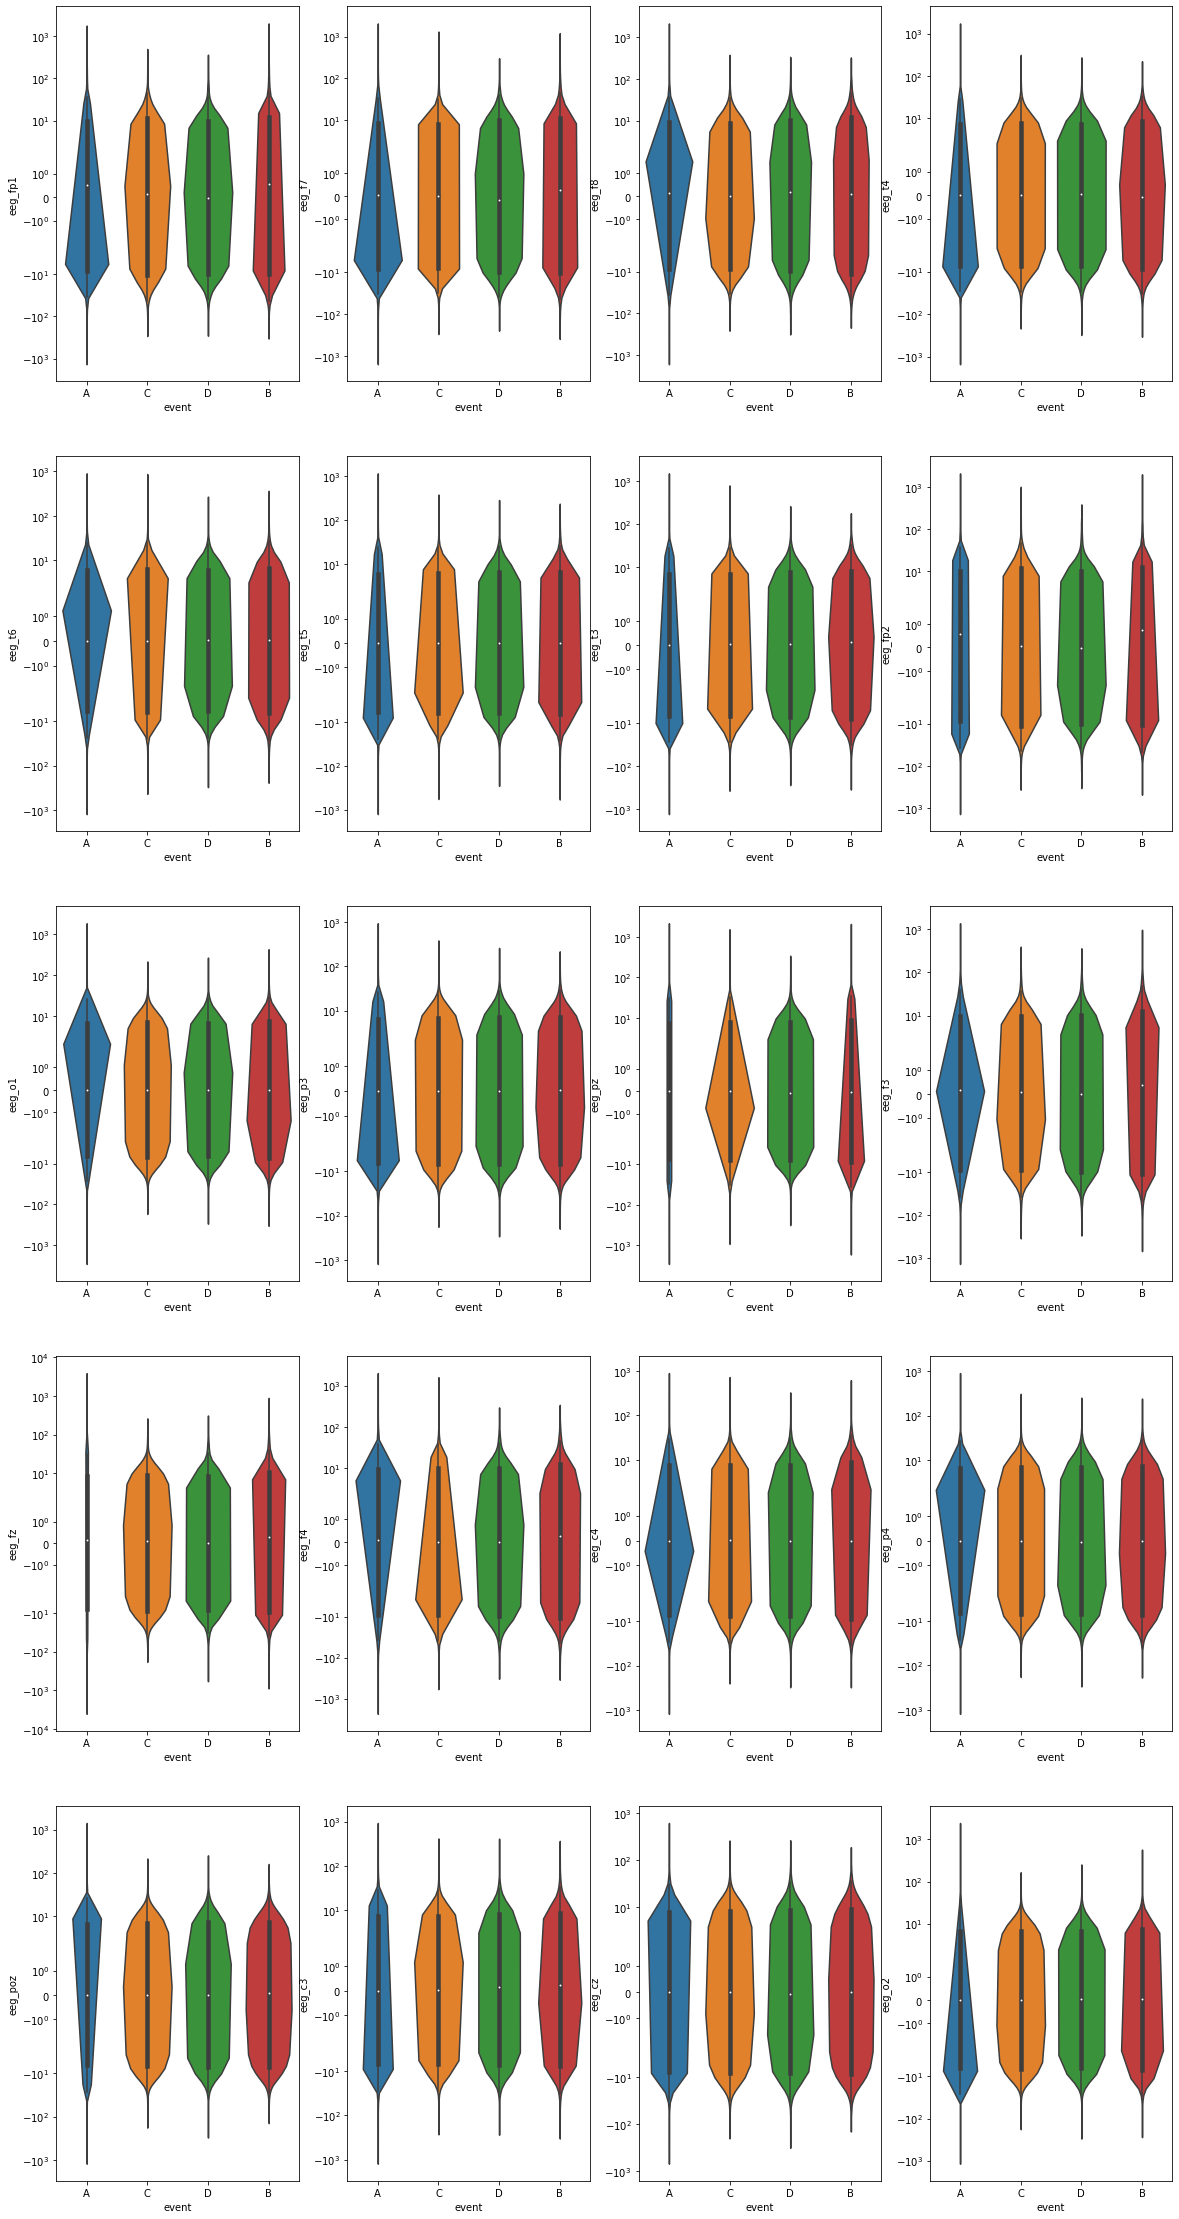

In [13]:
plt.figure(figsize=(20,40))
feats = ["eeg_fp1","eeg_f7","eeg_f8","eeg_t4","eeg_t6","eeg_t5","eeg_t3","eeg_fp2","eeg_o1","eeg_p3","eeg_pz","eeg_f3","eeg_fz","eeg_f4","eeg_c4","eeg_p4","eeg_poz","eeg_c3","eeg_cz","eeg_o2"]
for i,j in enumerate(feats):
    plt.subplot(5, 4, i+1)
    plt.yscale('symlog')
    sns.violinplot(x='event',y=j, data=train)
plt.show()

# Analysis of Noise in EEG data

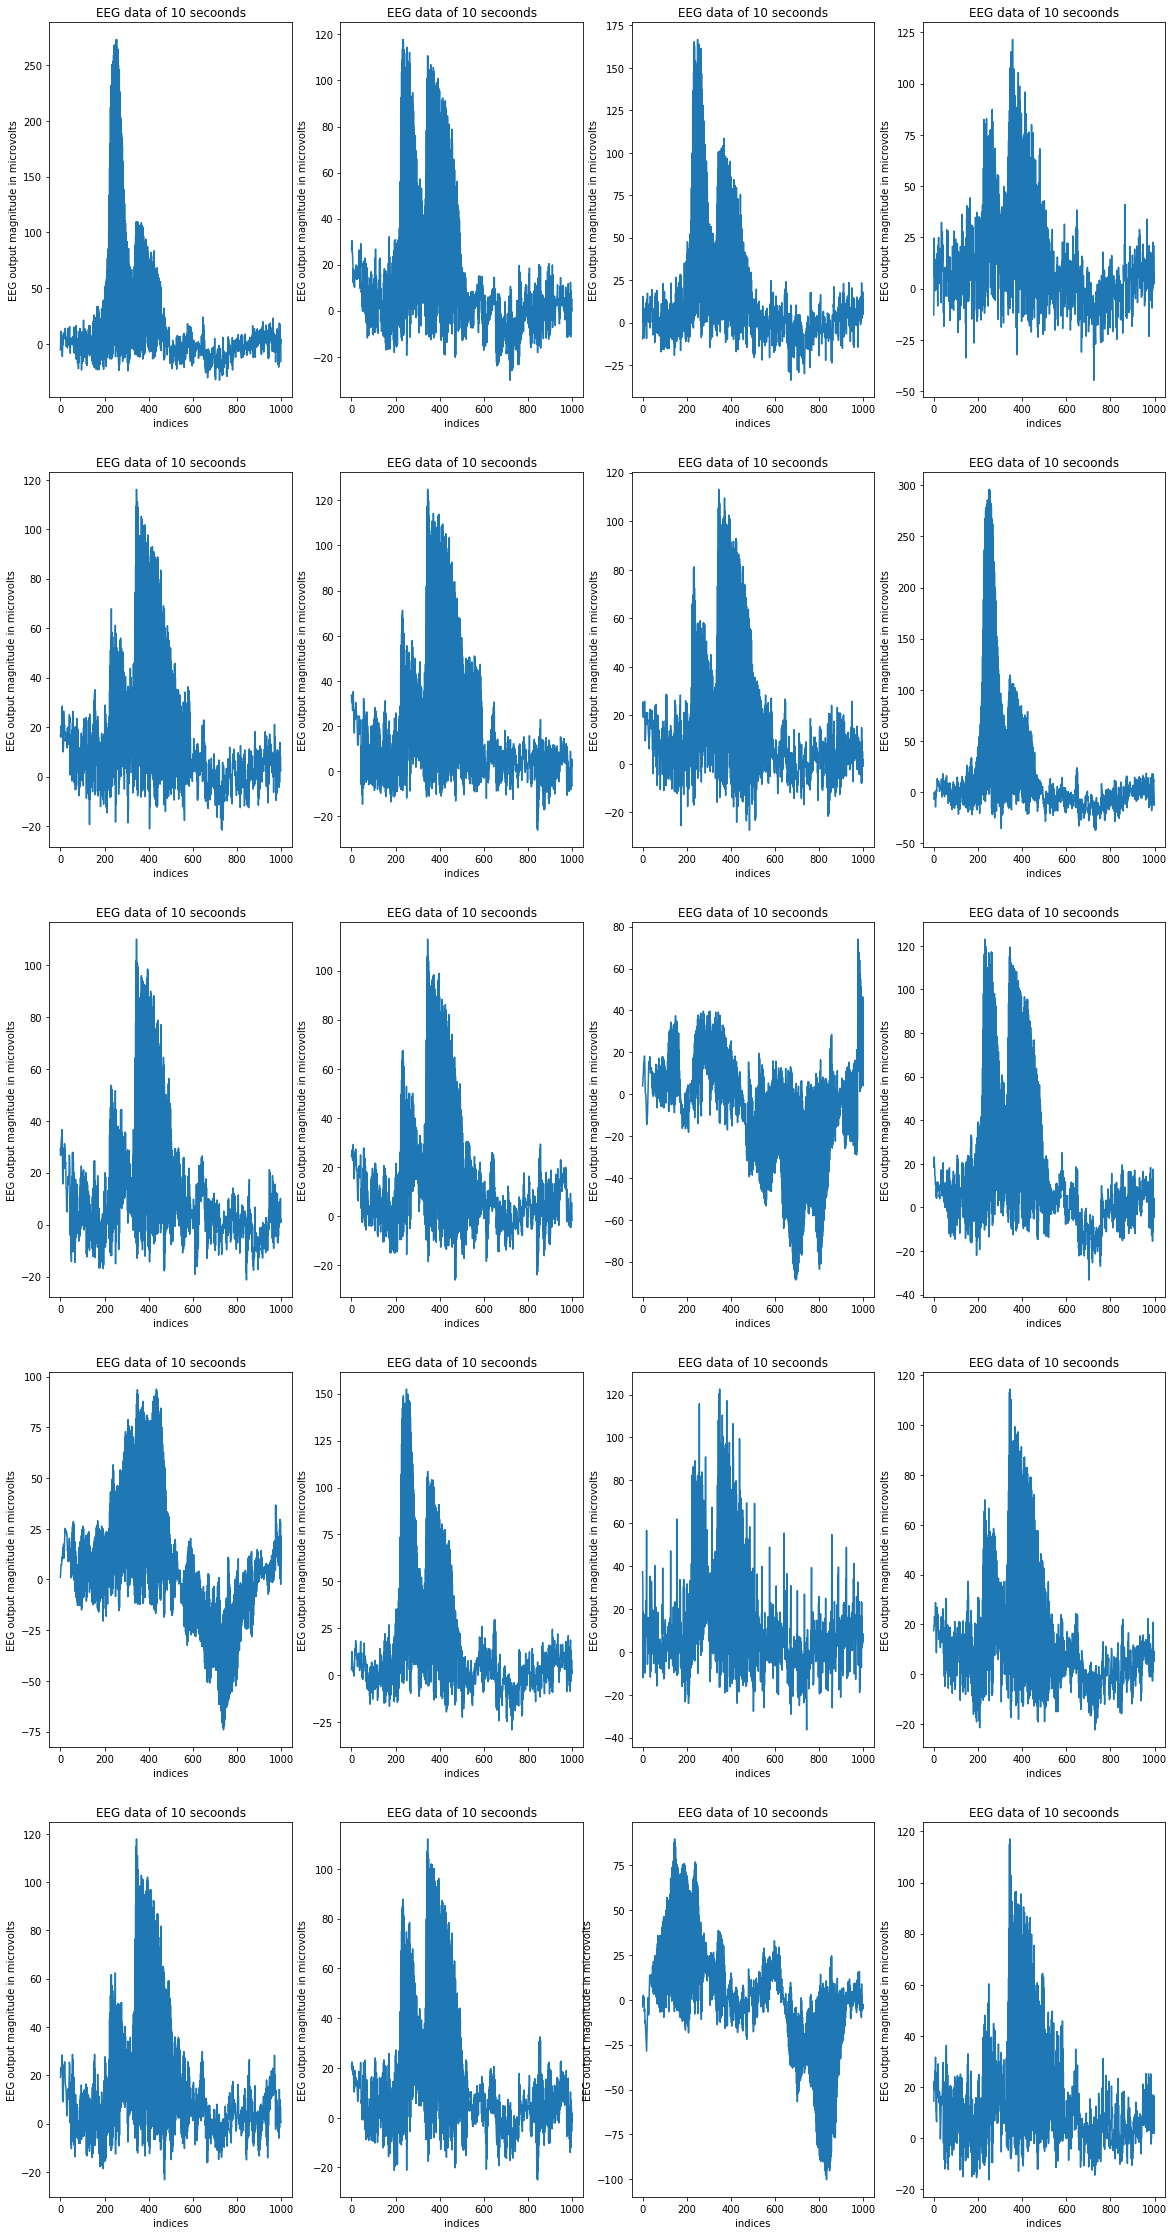

In [48]:
plt.figure(figsize=(20,40))
feats = ["eeg_fp1","eeg_f7","eeg_f8","eeg_t4","eeg_t6","eeg_t5","eeg_t3","eeg_fp2","eeg_o1","eeg_p3","eeg_pz","eeg_f3","eeg_fz","eeg_f4","eeg_c4","eeg_p4","eeg_poz","eeg_c3","eeg_cz","eeg_o2"]
for i,j in enumerate(feats):
    plt.subplot(5, 4, i+1)
    plt.plot(train[j][:1000])
    plt.title("EEG data of 10 secoonds")
    plt.xlabel("indices")
    plt.ylabel("EEG output magnitude in microvolts")

plt.show()

Noise exists for sure.

# TIME: Seconds into the experiment

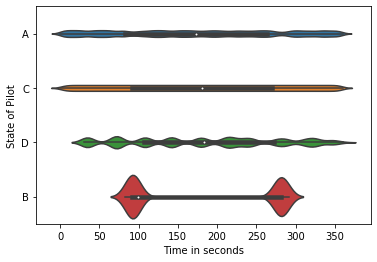

In [14]:
sns.violinplot(x='time', y='event',data= train)
plt.xlabel('Time in seconds')
plt.ylabel('State of Pilot')
plt.show()

Event B performs very differently when compared to other events. It occurs onlyat 2 time ranges, first at 75-100 seconds and between 250-300 seconds into the experiment.

Event D has an interesting nature which almost looks like a sinosoidal wave.

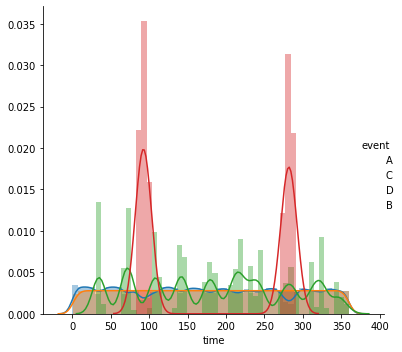

In [15]:
sns.FacetGrid(train, hue="event", size=5) \
   .add_legend() \
   .map(sns.distplot, "time"); 
plt.show();

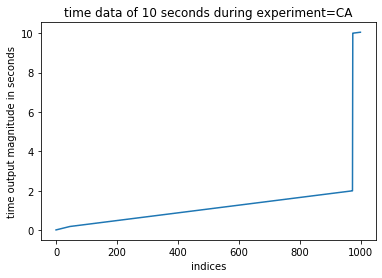

In [39]:
plt.plot(ca["time"][:1000])
plt.title("time data of 10 seconds during experiment=CA")
plt.xlabel("indices")
plt.ylabel("time output magnitude in seconds")

plt.show()

# GSR- Galvanic Skin Response — The measure of electrodermal activity
(Sensor output is in microvolts)

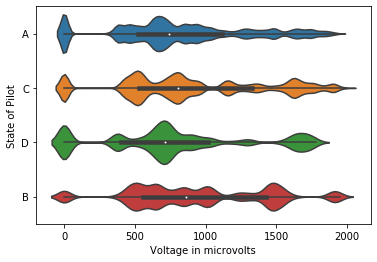

In [16]:
sns.violinplot(x='gsr', y='event',data= train)
plt.xlabel('Voltage in microvolts')
plt.ylabel('State of Pilot')
plt.show()

The GSR is in such a way that any of the four events dont occur between 150-400 microvolts.

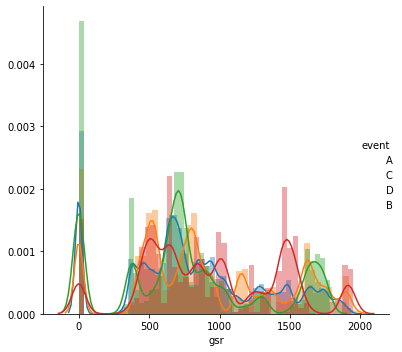

In [17]:
sns.FacetGrid(train, hue="event", size=5) \
   .add_legend() \
   .map(sns.distplot, "gsr"); 
plt.show();

The histograms overlapping too much and it is too congested to deduce a fact.

# Analysis of noise in the Galvanic Skin Response data

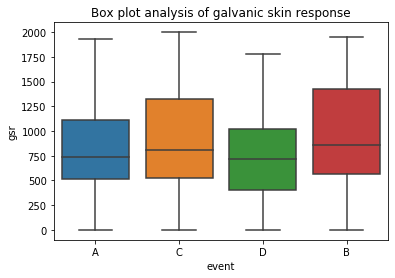

In [18]:
sns.boxplot(train["event"],train["gsr"])
plt.title("Box plot analysis of galvanic skin response")
plt.show()

The whiskers of the box plots are totally imbalanced which tell us the min and max value.
The percentiles also are totally unequal.

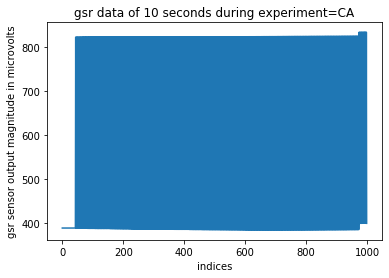

In [19]:
ca=train[train["experiment"]=="CA"]
ca.sort_values(by="time")

plt.plot(ca["gsr"][:1000])
plt.title("gsr data of 10 seconds during experiment=CA")
plt.xlabel("indices")
plt.ylabel("gsr sensor output magnitude in microvolts")

plt.show()

This graph clearly tells us that even the GSR data has noise included in it.

# Feature Engineering - NOISE REMOVAL 

In [5]:
train.sort_values(["crew","time"],ascending=True).groupby("experiment") # Sorting the values w.r.t experiment

In [6]:
import scipy.signal as signal
# https://stackoverflow.com/questions/35588782/how-to-average-a-signal-to-remove-noise-with-python
def noise_removal(noisy_data,Wn):
    N = 3
    B, A = signal.butter(N, Wn)
    return signal.filtfilt(B,A, noisy_data)

# Noise Removal in ECG DATA

In [7]:
ca=train[train["experiment"]=="CA"]

In [8]:
w = 0.1 # cutoff frequency- 10*the maximum possible frequency (10Hz or 100 beats per minute)
smoothened_ecg_data = noise_removal(train["ecg"],w)
train['smoothened_ecg_data'] = smoothened_ecg_data # Adding the smoothened data to the train dataset

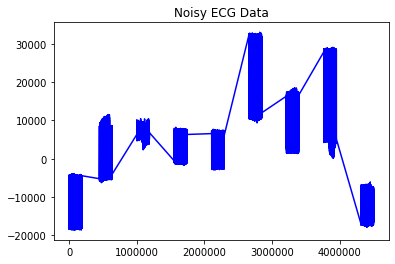

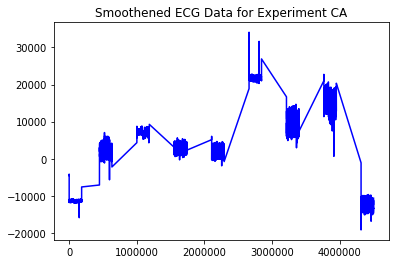

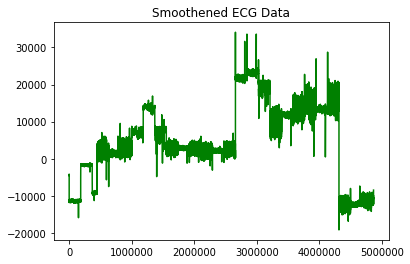

In [9]:
plt.plot(ca["ecg"],'b-')
plt.title('Noisy ECG Data')
plt.show()

ca=train[train["experiment"]=="CA"]
plt.plot(ca['smoothened_ecg_data'],'b-')
plt.title('Smoothened ECG Data for Experiment CA')
plt.show()

plt.plot(train['smoothened_ecg_data'],'g-')
plt.title('Smoothened ECG Data')
plt.show()

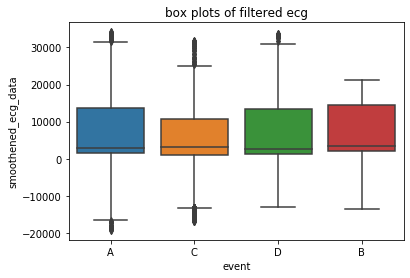

In [10]:
sns.boxplot(train["event"],train["smoothened_ecg_data"])
plt.title("box plots of filtered ecg")
plt.show()

# Noise Removal in Respiration data

In [11]:
w = 0.7 # cutoff frequency- 10*the maximum possible frequency (10Hz or 100 beats per minute)
smoothened_r_data = noise_removal(train["r"],w)
train['smoothened_r_data'] = smoothened_r_data # Adding the smoothened data to the train dataset

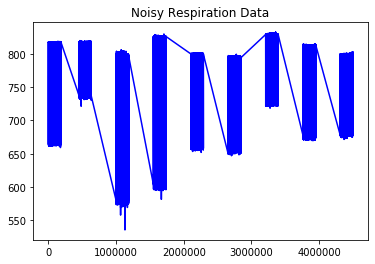

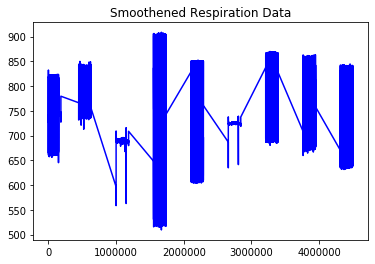

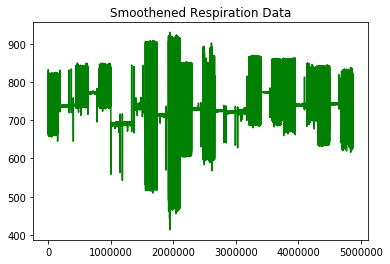

In [12]:
plt.plot(ca["r"],'b-')
plt.title('Noisy Respiration Data')
plt.show()

ca=train[train["experiment"]=="CA"]
plt.plot(ca['smoothened_r_data'],'b-')
plt.title('Smoothened Respiration Data')
plt.show()

plt.plot(train['smoothened_r_data'],'g-')
plt.title('Smoothened Respiration Data')
plt.show()

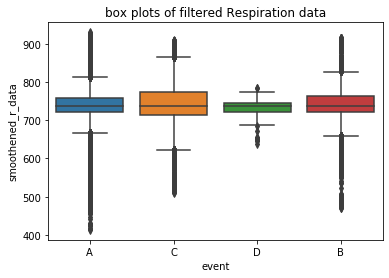

In [13]:
sns.boxplot(train["event"],train["smoothened_r_data"])
plt.title("box plots of filtered Respiration data")
plt.show()

# Noise Removal in GSR data

In [14]:
w = 0.7 # cutoff frequency- 10*the maximum possible frequency (10Hz or 100 beats per minute)
smoothened_gsr_data = noise_removal(train["gsr"],w)
train['smoothened_gsr_data'] = smoothened_gsr_data # Adding the smoothened data to the train dataset

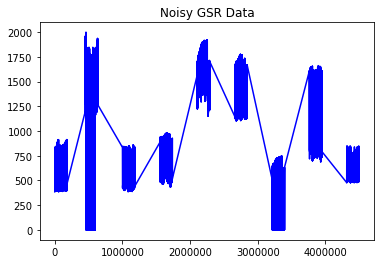

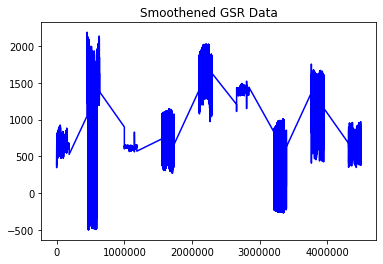

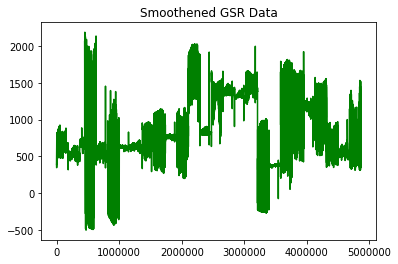

In [15]:
plt.plot(ca["gsr"],'b-')
plt.title('Noisy GSR Data')
plt.show()

ca=train[train["experiment"]=="CA"]
plt.plot(ca['smoothened_gsr_data'],'b-')
plt.title('Smoothened GSR Data')
plt.show()

plt.plot(train['smoothened_gsr_data'],'g-')
plt.title('Smoothened GSR Data')
plt.show()

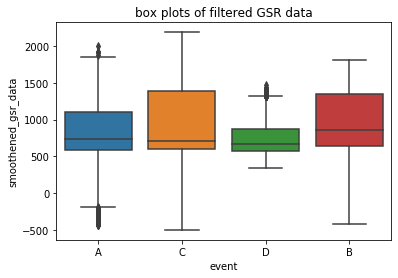

In [16]:
sns.boxplot(train["event"],train["smoothened_gsr_data"])
plt.title("box plots of filtered GSR data")
plt.show()

# Noise Removal in EEG data

In [17]:
train.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,smoothened_ecg_data,smoothened_r_data,smoothened_gsr_data
count,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,...,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06
mean,5.538783e+00,1.782358e+02,4.999531e-01,3.746336e+00,1.360002e+00,1.213644e+00,7.350926e-02,7.845481e-02,8.675488e-02,2.299909e-01,...,1.947635e-01,6.243715e-01,4.429119e-01,2.393738e-01,5.285460e+03,7.376090e+02,8.518467e+02,5.285461e+03,7.376090e+02,8.518467e+02
std,3.409353e+00,1.039592e+02,5.000000e-01,4.506763e+01,3.518923e+01,3.519242e+01,2.431472e+01,1.803932e+01,1.832606e+01,2.531132e+01,...,1.833801e+01,1.975695e+01,1.974815e+01,2.351859e+01,1.214126e+04,8.187979e+01,5.039324e+02,1.007669e+04,3.445577e+01,3.688417e+02
min,1.000000e+00,3.000000e-03,0.000000e+00,-1.361360e+03,-1.581330e+03,-1.643950e+03,-1.516640e+03,-1.220510e+03,-1.266430e+03,-1.279940e+03,...,-1.229130e+03,-1.230480e+03,-6.962790e+02,-1.176370e+03,-1.858570e+04,4.820600e+02,0.000000e+00,-1.914148e+04,4.129706e+02,-4.974109e+02
25%,3.000000e+00,8.808100e+01,0.000000e+00,-9.200250e+00,-8.325150e+00,-8.767610e+00,-7.367240e+00,-6.102000e+00,-6.007260e+00,-6.904030e+00,...,-6.774840e+00,-7.161160e+00,-7.817650e+00,-6.526950e+00,-2.550070e+03,6.631430e+02,5.241140e+02,1.436724e+03,7.212590e+02,5.901624e+02
50%,5.000000e+00,1.769297e+02,0.000000e+00,3.819020e-01,4.264100e-02,1.140390e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.920510e+03,7.434380e+02,7.701970e+02,3.002549e+03,7.378810e+02,7.300939e+02
75%,7.000000e+00,2.683398e+02,1.000000e+00,1.030610e+01,8.753340e+00,9.282560e+00,7.437780e+00,6.176630e+00,6.086460e+00,7.071460e+00,...,6.905020e+00,7.466520e+00,8.025190e+00,6.615180e+00,1.029010e+04,8.134120e+02,1.197120e+03,1.340555e+04,7.666318e+02,1.167960e+03
max,1.300000e+01,3.603711e+02,1.000000e+00,1.972240e+03,2.048790e+03,2.145710e+03,1.731880e+03,9.009370e+02,1.176540e+03,1.514820e+03,...,1.435800e+03,9.284070e+02,6.136690e+02,2.443550e+03,3.418830e+04,8.401840e+02,1.999860e+03,3.406750e+04,9.303458e+02,2.184002e+03


In [18]:
w = 0.7 # cutoff frequency- 10*the maximum possible frequency (10Hz or 100 beats per minute)
feats = ["eeg_fp1","eeg_f7","eeg_f8","eeg_t4","eeg_t6","eeg_t5","eeg_t3","eeg_fp2","eeg_o1","eeg_p3","eeg_pz","eeg_f3","eeg_fz","eeg_f4","eeg_c4","eeg_p4","eeg_poz","eeg_c3","eeg_cz","eeg_o2"]
smoothened_eeg_fp1 = noise_removal(train['eeg_fp1'],w)
train['smoothened_eeg_fp1'] = smoothened_eeg_fp1 # Adding the smoothened data to the train dataset

In [19]:
smoothened_eeg_f7 = noise_removal(train['eeg_f7'],w)
train['smoothened_eeg_f7'] = smoothened_eeg_f7 # Adding the smoothened data to the train dataset

In [20]:
train.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_cz,eeg_o2,ecg,r,gsr,smoothened_ecg_data,smoothened_r_data,smoothened_gsr_data,smoothened_eeg_fp1,smoothened_eeg_f7
count,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,...,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06
mean,5.538783e+00,1.782358e+02,4.999531e-01,3.746336e+00,1.360002e+00,1.213644e+00,7.350926e-02,7.845481e-02,8.675488e-02,2.299909e-01,...,4.429119e-01,2.393738e-01,5.285460e+03,7.376090e+02,8.518467e+02,5.285461e+03,7.376090e+02,8.518467e+02,3.746335e+00,1.360000e+00
std,3.409353e+00,1.039592e+02,5.000000e-01,4.506763e+01,3.518923e+01,3.519242e+01,2.431472e+01,1.803932e+01,1.832606e+01,2.531132e+01,...,1.974815e+01,2.351859e+01,1.214126e+04,8.187979e+01,5.039324e+02,1.007669e+04,3.445577e+01,3.688417e+02,3.341949e+01,2.644216e+01
min,1.000000e+00,3.000000e-03,0.000000e+00,-1.361360e+03,-1.581330e+03,-1.643950e+03,-1.516640e+03,-1.220510e+03,-1.266430e+03,-1.279940e+03,...,-6.962790e+02,-1.176370e+03,-1.858570e+04,4.820600e+02,0.000000e+00,-1.914148e+04,4.129706e+02,-4.974109e+02,-1.193737e+03,-1.345013e+03
25%,3.000000e+00,8.808100e+01,0.000000e+00,-9.200250e+00,-8.325150e+00,-8.767610e+00,-7.367240e+00,-6.102000e+00,-6.007260e+00,-6.904030e+00,...,-7.817650e+00,-6.526950e+00,-2.550070e+03,6.631430e+02,5.241140e+02,1.436724e+03,7.212590e+02,5.901624e+02,-7.506818e+00,-6.834298e+00
50%,5.000000e+00,1.769297e+02,0.000000e+00,3.819020e-01,4.264100e-02,1.140390e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.920510e+03,7.434380e+02,7.701970e+02,3.002549e+03,7.378810e+02,7.300939e+02,6.330693e-01,2.248344e-01
75%,7.000000e+00,2.683398e+02,1.000000e+00,1.030610e+01,8.753340e+00,9.282560e+00,7.437780e+00,6.176630e+00,6.086460e+00,7.071460e+00,...,8.025190e+00,6.615180e+00,1.029010e+04,8.134120e+02,1.197120e+03,1.340555e+04,7.666318e+02,1.167960e+03,9.523853e+00,7.733930e+00
max,1.300000e+01,3.603711e+02,1.000000e+00,1.972240e+03,2.048790e+03,2.145710e+03,1.731880e+03,9.009370e+02,1.176540e+03,1.514820e+03,...,6.136690e+02,2.443550e+03,3.418830e+04,8.401840e+02,1.999860e+03,3.406750e+04,9.303458e+02,2.184002e+03,1.617656e+03,1.838539e+03


In [21]:
train['smoothened_eeg_f8'] = noise_removal(train['eeg_f8'],w)

In [22]:
train.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_o2,ecg,r,gsr,smoothened_ecg_data,smoothened_r_data,smoothened_gsr_data,smoothened_eeg_fp1,smoothened_eeg_f7,smoothened_eeg_f8
count,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,...,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06
mean,5.538783e+00,1.782358e+02,4.999531e-01,3.746336e+00,1.360002e+00,1.213644e+00,7.350926e-02,7.845481e-02,8.675488e-02,2.299909e-01,...,2.393738e-01,5.285460e+03,7.376090e+02,8.518467e+02,5.285461e+03,7.376090e+02,8.518467e+02,3.746335e+00,1.360000e+00,1.213644e+00
std,3.409353e+00,1.039592e+02,5.000000e-01,4.506763e+01,3.518923e+01,3.519242e+01,2.431472e+01,1.803932e+01,1.832606e+01,2.531132e+01,...,2.351859e+01,1.214126e+04,8.187979e+01,5.039324e+02,1.007669e+04,3.445577e+01,3.688417e+02,3.341949e+01,2.644216e+01,2.672024e+01
min,1.000000e+00,3.000000e-03,0.000000e+00,-1.361360e+03,-1.581330e+03,-1.643950e+03,-1.516640e+03,-1.220510e+03,-1.266430e+03,-1.279940e+03,...,-1.176370e+03,-1.858570e+04,4.820600e+02,0.000000e+00,-1.914148e+04,4.129706e+02,-4.974109e+02,-1.193737e+03,-1.345013e+03,-1.845558e+03
25%,3.000000e+00,8.808100e+01,0.000000e+00,-9.200250e+00,-8.325150e+00,-8.767610e+00,-7.367240e+00,-6.102000e+00,-6.007260e+00,-6.904030e+00,...,-6.526950e+00,-2.550070e+03,6.631430e+02,5.241140e+02,1.436724e+03,7.212590e+02,5.901624e+02,-7.506818e+00,-6.834298e+00,-7.215019e+00
50%,5.000000e+00,1.769297e+02,0.000000e+00,3.819020e-01,4.264100e-02,1.140390e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.920510e+03,7.434380e+02,7.701970e+02,3.002549e+03,7.378810e+02,7.300939e+02,6.330693e-01,2.248344e-01,2.792751e-01
75%,7.000000e+00,2.683398e+02,1.000000e+00,1.030610e+01,8.753340e+00,9.282560e+00,7.437780e+00,6.176630e+00,6.086460e+00,7.071460e+00,...,6.615180e+00,1.029010e+04,8.134120e+02,1.197120e+03,1.340555e+04,7.666318e+02,1.167960e+03,9.523853e+00,7.733930e+00,8.149342e+00
max,1.300000e+01,3.603711e+02,1.000000e+00,1.972240e+03,2.048790e+03,2.145710e+03,1.731880e+03,9.009370e+02,1.176540e+03,1.514820e+03,...,2.443550e+03,3.418830e+04,8.401840e+02,1.999860e+03,3.406750e+04,9.303458e+02,2.184002e+03,1.617656e+03,1.838539e+03,2.238041e+03


In [23]:
train['smoothened_eeg_t4'] = noise_removal(train['eeg_t4'],w) # Adding the smoothened data to the train dataset

In [24]:
train['smoothened_eeg_t6'] = noise_removal(train['eeg_t6'],w) # Adding the smoothened data to the train dataset

In [25]:
train['smoothened_eeg_t5'] = noise_removal(train['eeg_t5'],w) # Adding the smoothened data to the train dataset

In [26]:
train['smoothened_eeg_t3'] = noise_removal(train['eeg_t3'],w) # Adding the smoothened data to the train dataset

In [27]:
train['smoothened_eeg_fp2'] = noise_removal(train['eeg_fp2'],w) # Adding the smoothened data to the train dataset

In [28]:
train['smoothened_eeg_o1'] = noise_removal(train['eeg_o1'],w) # Adding the smoothened data to the train dataset

In [29]:
train['smoothened_eeg_p3'] = noise_removal(train['eeg_p3'],w) # Adding the smoothened data to the train dataset

In [30]:
train['smoothened_eeg_pz'] = noise_removal(train['eeg_pz'],w) # Adding the smoothened data to the train dataset

In [31]:
train['smoothened_eeg_f3'] = noise_removal(train['eeg_f3'],w) # Adding the smoothened data to the train dataset

In [32]:
train['smoothened_eeg_fz'] = noise_removal(train['eeg_fz'],w) # Adding the smoothened data to the train dataset

In [33]:
train['smoothened_eeg_f4'] = noise_removal(train['eeg_f4'],w) # Adding the smoothened data to the train dataset

In [34]:
train['smoothened_eeg_c4'] = noise_removal(train['eeg_c4'],w) # Adding the smoothened data to the train dataset

In [35]:
train['smoothened_eeg_p4'] = noise_removal(train['eeg_p4'],w) # Adding the smoothened data to the train dataset

In [36]:
train['smoothened_eeg_poz'] = noise_removal(train['eeg_poz'],w) # Adding the smoothened data to the train dataset

In [37]:
train['smoothened_eeg_c3'] = noise_removal(train['eeg_c3'],w) # Adding the smoothened data to the train dataset

In [38]:
train['smoothened_eeg_cz'] = noise_removal(train['eeg_cz'],w) # Adding the smoothened data to the train dataset

In [39]:
train['smoothened_eeg_o2'] = noise_removal(train['eeg_o2'],w) # Adding the smoothened data to the train dataset

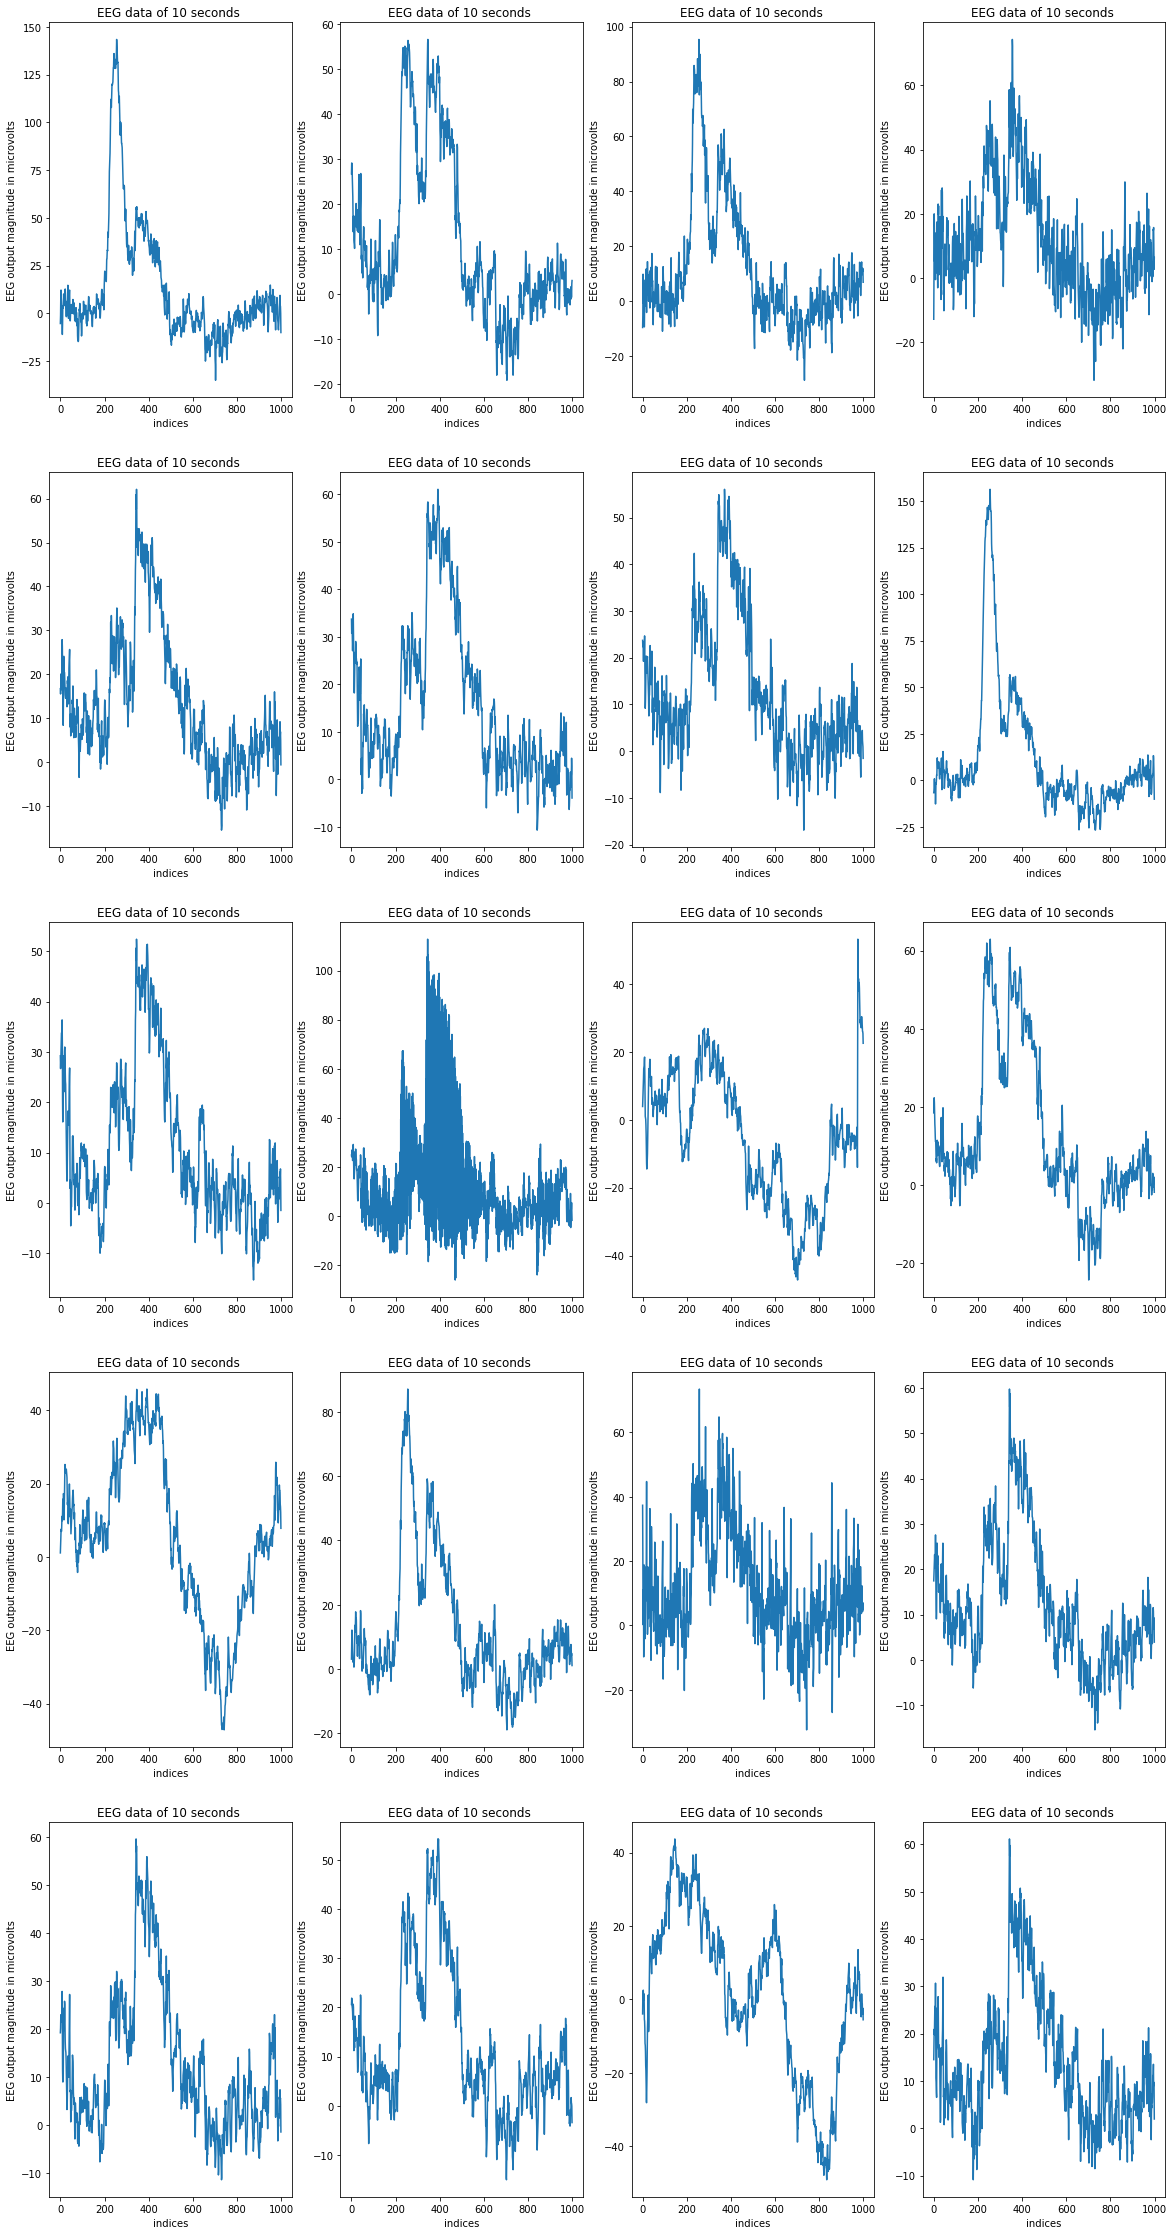

In [38]:
plt.figure(figsize=(20,40))
feats = ["smoothened_eeg_fp1","smoothened_eeg_f7","smoothened_eeg_f8","smoothened_eeg_t4","smoothened_eeg_t6","smoothened_eeg_t5","smoothened_eeg_t3","smoothened_eeg_fp2","smoothened_eeg_o1","eeg_p3","smoothened_eeg_pz","smoothened_eeg_f3","smoothened_eeg_fz","smoothened_eeg_f4","smoothened_eeg_c4","smoothened_eeg_p4","smoothened_eeg_poz","smoothened_eeg_c3","smoothened_eeg_cz","smoothened_eeg_o2"]
for i,j in enumerate(feats):
    plt.subplot(5, 4, i+1)
    plt.plot(train[j][:1000])
    plt.title("EEG data of 10 seconds ")
    plt.xlabel("indices")
    plt.ylabel("EEG output magnitude in microvolts")

plt.show()

# Checking the correlation among other features

In [39]:
corrMatrix = train.corr()
print(corrMatrix)

                         crew      time      seat   eeg_fp1    eeg_f7  \
crew                 1.000000  0.020509 -0.000026  0.004439 -0.000304   
time                 0.020509  1.000000 -0.000092 -0.001095  0.000230   
seat                -0.000026 -0.000092  1.000000  0.001293  0.009259   
eeg_fp1              0.004439 -0.001095  0.001293  1.000000  0.649661   
eeg_f7              -0.000304  0.000230  0.009259  0.649661  1.000000   
eeg_f8               0.003582 -0.000951  0.004619  0.561712  0.493707   
eeg_t4              -0.000615 -0.001122  0.007370  0.434736  0.454118   
eeg_t6               0.009451 -0.000004  0.000428  0.328606  0.309661   
eeg_t5               0.004767  0.001654  0.005459  0.332473  0.466838   
eeg_t3              -0.001903  0.000063  0.007842  0.412335  0.510271   
eeg_fp2              0.004089 -0.001906  0.002734  0.808817  0.666813   
eeg_o1               0.001793  0.001169  0.003672  0.230432  0.158739   
eeg_p3               0.002454  0.000479  0.002070  

#### Observations:
1. Most of the points are positive i.e they are highly correlated.
2. The highest value is 0.895856 which is for 'seat' and 'r'.

# Heatmap

RAM wasnt sufficient to compute the heatmap for the 49 featured dataset

In [39]:
tr = pd.read_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train.csv')
labelencoder = LabelEncoder()
tr['event'] = labelencoder.fit_transform(tr['event'])

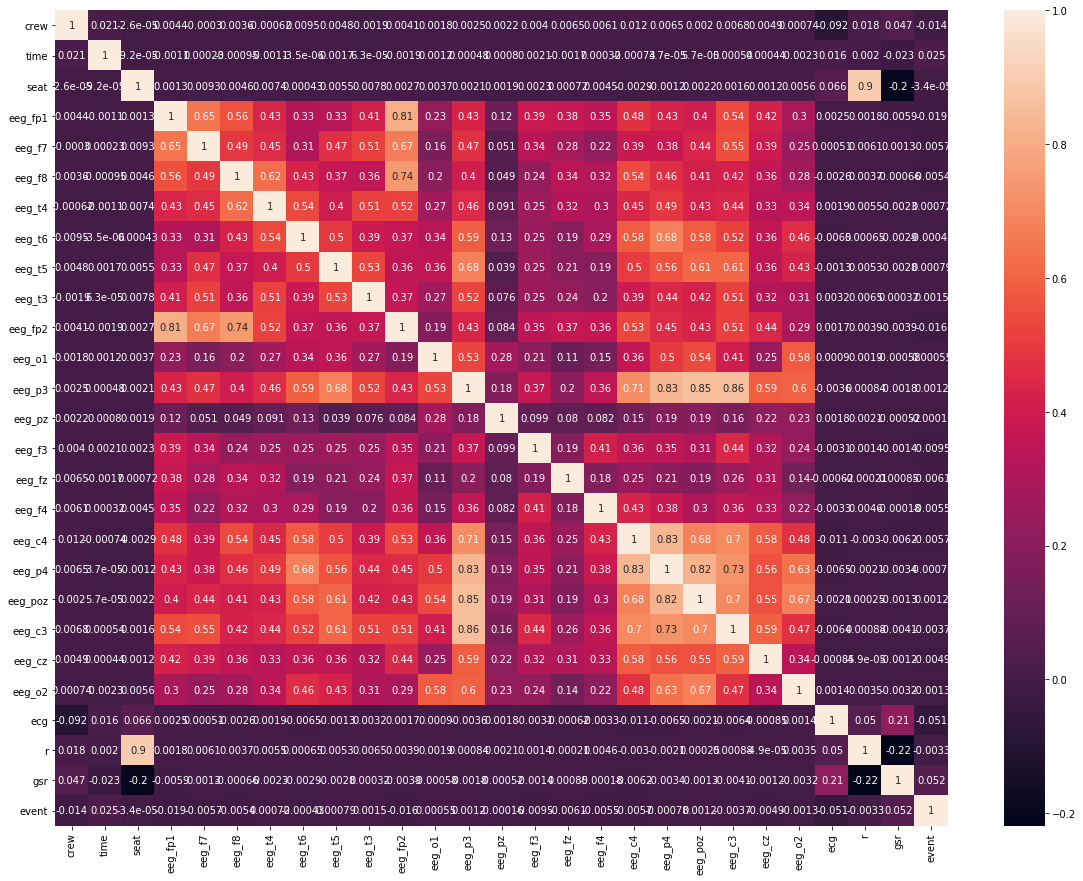

In [40]:
plt.figure(figsize=(20,15))
corrMatrix = tr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Observations: 
1. Here also we can see that 'r' and 'seat' are highly correlated.
2. All the EEG measurements share a better correlation factor among themselves rather than other factors.

# Exploratory Data Analysis on Test Data

Number of data points :  Delayed('int-c34c6641-8d35-4dd1-b19f-15b91317b8bd')
Number of features :  28
Features :  ['id' 'crew' 'experiment' 'time' 'seat' 'eeg_fp1' 'eeg_f7' 'eeg_f8'
 'eeg_t4' 'eeg_t6' 'eeg_t5' 'eeg_t3' 'eeg_fp2' 'eeg_o1' 'eeg_p3' 'eeg_pz'
 'eeg_f3' 'eeg_fz' 'eeg_f4' 'eeg_c4' 'eeg_p4' 'eeg_poz' 'eeg_c3' 'eeg_cz'
 'eeg_o2' 'ecg' 'r' 'gsr']


,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


# Respiration

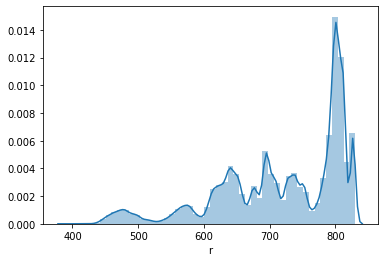

In [36]:
sns.distplot(test['r'])

# ECG values

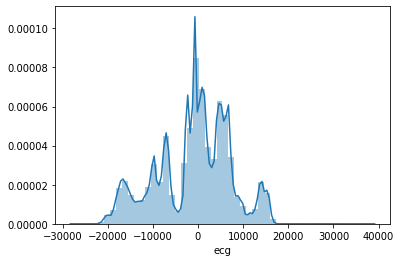

In [37]:
sns.distplot(test['ecg'])

# GSR values

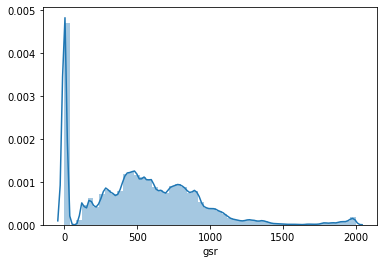

In [38]:
sns.distplot(test['gsr'])

EEG features:
   take SVD truncated svd and take components
   how many components as hyperparameters 
   eeg signals noise filtering - butterverse filter for noise, bandwidth filters
   feature engg
   bivariate analysis
   top 10 feats - do eda on them 
   null value analysis

In [6]:
test_id = test['id']

# Observations in EDA and Feature Engineering

1. Most of the time the pilots are very attentive but sometimes the pilots get distracted to get into CA, DA states mostly and entering into the SS state is very rare.
2. Key features like ECG, EEG, GSR, Respiration had noise which had to be smoothened for further use in the models.

# Saving the dataset

In [42]:
train.to_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening.csv')

# Normalizing the EEG features 

In [3]:
df_train = pd.read_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening.csv')
scaler = MinMaxScaler()
df_train[['smoothened_eeg_fp1']] = scaler.fit_transform(df_train[['smoothened_eeg_fp1']])

In [4]:
df_train[['smoothened_eeg_f7']] = scaler.fit_transform(df_train[['smoothened_eeg_f7']])

In [5]:
df_train[['smoothened_eeg_f8']] = scaler.fit_transform(df_train[['smoothened_eeg_f8']])

In [6]:
df_train[['smoothened_eeg_t6']] = scaler.fit_transform(df_train[['smoothened_eeg_t6']])

In [7]:
df_train[['smoothened_eeg_t4']] = scaler.fit_transform(df_train[['smoothened_eeg_t4']])

In [8]:
df_train[['smoothened_eeg_t5']] = scaler.fit_transform(df_train[['smoothened_eeg_t5']])

In [9]:
df_train[['smoothened_eeg_t3']] = scaler.fit_transform(df_train[['smoothened_eeg_t3']])

In [10]:
df_train[['smoothened_eeg_fp2']] = scaler.fit_transform(df_train[['smoothened_eeg_fp2']])

In [11]:
df_train[['smoothened_eeg_o1']] = scaler.fit_transform(df_train[['smoothened_eeg_o1']])

In [12]:
df_train[['smoothened_eeg_p3']] = scaler.fit_transform(df_train[['smoothened_eeg_p3']])

In [13]:
df_train[['smoothened_eeg_pz']] = scaler.fit_transform(df_train[['smoothened_eeg_pz']])

In [14]:
df_train[['smoothened_eeg_f3']] = scaler.fit_transform(df_train[['smoothened_eeg_f3']])

In [15]:
df_train[['smoothened_eeg_fz']] = scaler.fit_transform(df_train[['smoothened_eeg_fz']])

In [16]:
df_train[['smoothened_eeg_f4']] = scaler.fit_transform(df_train[['smoothened_eeg_f4']])

In [17]:
df_train[['smoothened_eeg_c4']] = scaler.fit_transform(df_train[['smoothened_eeg_c4']])

In [18]:
df_train[['smoothened_eeg_p4']] = scaler.fit_transform(df_train[['smoothened_eeg_p4']])

In [19]:
df_train[['smoothened_eeg_poz']] = scaler.fit_transform(df_train[['smoothened_eeg_poz']])

In [20]:
df_train[['smoothened_eeg_c3']] = scaler.fit_transform(df_train[['smoothened_eeg_c3']])

In [21]:
df_train[['smoothened_eeg_cz']] = scaler.fit_transform(df_train[['smoothened_eeg_cz']])

In [22]:
df_train[['smoothened_eeg_o2']] = scaler.fit_transform(df_train[['smoothened_eeg_o2']])

In [23]:
df_train[['smoothened_ecg_data']] = scaler.fit_transform(df_train[['smoothened_ecg_data']])

In [24]:
df_train[['smoothened_r_data']] = scaler.fit_transform(df_train[['smoothened_r_data']])

In [25]:
df_train[['smoothened_gsr_data']] = scaler.fit_transform(df_train[['smoothened_gsr_data']])

# Saving the dataset

df_train.to_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening_2.csv')

# Other feature Engineering techniques

In [2]:
df_train = pd.read_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening_2.csv')

In [3]:
print('Features : ', df_train.columns.values)

Features :  ['Unnamed: 0' 'Unnamed: 0.1' 'crew' 'experiment' 'time' 'seat' 'eeg_fp1'
 'eeg_f7' 'eeg_f8' 'eeg_t4' 'eeg_t6' 'eeg_t5' 'eeg_t3' 'eeg_fp2' 'eeg_o1'
 'eeg_p3' 'eeg_pz' 'eeg_f3' 'eeg_fz' 'eeg_f4' 'eeg_c4' 'eeg_p4' 'eeg_poz'
 'eeg_c3' 'eeg_cz' 'eeg_o2' 'ecg' 'r' 'gsr' 'event' 'smoothened_ecg_data'
 'smoothened_r_data' 'smoothened_gsr_data' 'smoothened_eeg_fp1'
 'smoothened_eeg_f7' 'smoothened_eeg_f8' 'smoothened_eeg_t4'
 'smoothened_eeg_t6' 'smoothened_eeg_t5' 'smoothened_eeg_t3'
 'smoothened_eeg_fp2' 'smoothened_eeg_o1' 'smoothened_eeg_p3'
 'smoothened_eeg_pz' 'smoothened_eeg_f3' 'smoothened_eeg_fz'
 'smoothened_eeg_f4' 'smoothened_eeg_c4' 'smoothened_eeg_p4'
 'smoothened_eeg_poz' 'smoothened_eeg_c3' 'smoothened_eeg_cz'
 'smoothened_eeg_o2']


In [4]:
df_train = df_train.drop(["eeg_fp1","eeg_f7","eeg_f8","eeg_t4","eeg_t6","eeg_t5","eeg_t3","eeg_o1","eeg_p3","eeg_pz","eeg_f3","eeg_fz","eeg_f4","eeg_c4","eeg_p4","eeg_poz","eeg_c3","eeg_cz","eeg_o2","r","gsr","ecg","eeg_fp2"],axis=1)

In [5]:
print('Features : ', df_train.columns.values)

Features :  ['Unnamed: 0' 'Unnamed: 0.1' 'crew' 'experiment' 'time' 'seat' 'event'
 'smoothened_ecg_data' 'smoothened_r_data' 'smoothened_gsr_data'
 'smoothened_eeg_fp1' 'smoothened_eeg_f7' 'smoothened_eeg_f8'
 'smoothened_eeg_t4' 'smoothened_eeg_t6' 'smoothened_eeg_t5'
 'smoothened_eeg_t3' 'smoothened_eeg_fp2' 'smoothened_eeg_o1'
 'smoothened_eeg_p3' 'smoothened_eeg_pz' 'smoothened_eeg_f3'
 'smoothened_eeg_fz' 'smoothened_eeg_f4' 'smoothened_eeg_c4'
 'smoothened_eeg_p4' 'smoothened_eeg_poz' 'smoothened_eeg_c3'
 'smoothened_eeg_cz' 'smoothened_eeg_o2']


In [6]:
df_train.shape

(4867421, 30)

# Saving the data

df_train.to_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening_lgbm.csv')

# The Experiment feature is in Alphabets, so we have to convert it to numericals

In [2]:
df_train = pd.read_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening_lgbm.csv')

In [3]:
df_train['experiment'] = df_train['experiment'].map({'CA': 0, 'DA': 1, 'SS': 2, 'LOFT': 3})
df_train["experiment"] = df_train["experiment"].astype('int8')
df_train

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,crew,experiment,time,seat,event,smoothened_ecg_data,smoothened_r_data,...,smoothened_eeg_pz,smoothened_eeg_f3,smoothened_eeg_fz,smoothened_eeg_f4,smoothened_eeg_c4,smoothened_eeg_p4,smoothened_eeg_poz,smoothened_eeg_c3,smoothened_eeg_cz,smoothened_eeg_o2
0,0,0,0,1,0,0.011719,1,A,0.274755,0.782286,...,0.482880,0.523979,0.523364,0.461031,0.567931,0.589564,0.331786,0.552896,0.495478,0.484320
1,1,1,1,1,0,0.015625,1,A,0.274762,0.782286,...,0.483321,0.524945,0.523568,0.462672,0.555012,0.590890,0.332135,0.553995,0.499284,0.486074
2,2,2,2,1,0,0.019531,1,A,0.274775,0.782286,...,0.483740,0.525433,0.523840,0.464316,0.535427,0.592171,0.333059,0.553731,0.500125,0.486987
3,3,3,3,1,0,0.023438,1,A,0.274795,0.782286,...,0.484056,0.524927,0.524120,0.464164,0.542754,0.594125,0.333156,0.552512,0.500554,0.486514
4,4,4,4,1,0,0.027344,1,A,0.274822,0.782286,...,0.484675,0.523754,0.524198,0.462932,0.544984,0.594965,0.333128,0.552229,0.499537,0.487844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867416,4867416,4867416,4867416,13,2,99.991005,1,A,0.165976,0.570142,...,0.477754,0.485500,0.519751,0.449000,0.544560,0.565472,0.319350,0.532427,0.477813,0.473767
4867417,4867417,4867417,4867417,13,2,99.993004,0,A,0.173328,0.592765,...,0.480649,0.493671,0.521919,0.466385,0.590118,0.556305,0.322173,0.574295,0.492802,0.472740
4867418,4867418,4867418,4867418,13,2,99.994003,1,A,0.181932,0.577402,...,0.485860,0.497991,0.523764,0.465601,0.591356,0.601829,0.330958,0.602124,0.510355,0.483686
4867419,4867419,4867419,4867419,13,2,99.997002,0,A,0.191441,0.544842,...,0.498135,0.506017,0.529700,0.486331,0.660487,0.694030,0.349476,0.681118,0.554426,0.503789


# The Events feature is in Alphabets, so we have to convert it to numericals

In [4]:
df_train['event'] = df_train['event'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})
df_train["event"] = df_train["event"].astype('int8')
df_train

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,crew,experiment,time,seat,event,smoothened_ecg_data,smoothened_r_data,...,smoothened_eeg_pz,smoothened_eeg_f3,smoothened_eeg_fz,smoothened_eeg_f4,smoothened_eeg_c4,smoothened_eeg_p4,smoothened_eeg_poz,smoothened_eeg_c3,smoothened_eeg_cz,smoothened_eeg_o2
0,0,0,0,1,0,0.011719,1,0,0.274755,0.782286,...,0.482880,0.523979,0.523364,0.461031,0.567931,0.589564,0.331786,0.552896,0.495478,0.484320
1,1,1,1,1,0,0.015625,1,0,0.274762,0.782286,...,0.483321,0.524945,0.523568,0.462672,0.555012,0.590890,0.332135,0.553995,0.499284,0.486074
2,2,2,2,1,0,0.019531,1,0,0.274775,0.782286,...,0.483740,0.525433,0.523840,0.464316,0.535427,0.592171,0.333059,0.553731,0.500125,0.486987
3,3,3,3,1,0,0.023438,1,0,0.274795,0.782286,...,0.484056,0.524927,0.524120,0.464164,0.542754,0.594125,0.333156,0.552512,0.500554,0.486514
4,4,4,4,1,0,0.027344,1,0,0.274822,0.782286,...,0.484675,0.523754,0.524198,0.462932,0.544984,0.594965,0.333128,0.552229,0.499537,0.487844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867416,4867416,4867416,4867416,13,2,99.991005,1,0,0.165976,0.570142,...,0.477754,0.485500,0.519751,0.449000,0.544560,0.565472,0.319350,0.532427,0.477813,0.473767
4867417,4867417,4867417,4867417,13,2,99.993004,0,0,0.173328,0.592765,...,0.480649,0.493671,0.521919,0.466385,0.590118,0.556305,0.322173,0.574295,0.492802,0.472740
4867418,4867418,4867418,4867418,13,2,99.994003,1,0,0.181932,0.577402,...,0.485860,0.497991,0.523764,0.465601,0.591356,0.601829,0.330958,0.602124,0.510355,0.483686
4867419,4867419,4867419,4867419,13,2,99.997002,0,0,0.191441,0.544842,...,0.498135,0.506017,0.529700,0.486331,0.660487,0.694030,0.349476,0.681118,0.554426,0.503789


In [5]:
df_train.shape

(4867421, 31)

# Saving the dataset

In [6]:
df_train.to_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening_2.csv')

# Splitting the data

In [2]:
df_train = pd.read_csv('E:/BOOKS_NEW/Cases datasets/1st/reducing-commercial-aviation-fatalities/train_after_smoothening_2.csv')

In [3]:
import re
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
train, test = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True)

In [5]:
x_train = train.loc[:, df_train.columns != 'event']
y_train = train['event']

x_test = test.loc[:, df_train.columns != 'event']
y_test = test['event']

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print('-----------------------------------------------')
print('Features of x_train : ', x_train.columns.values)
print('Features of x_test: ', x_test.columns.values)
print('-----------------------------------------------')
print('Values of y_train: ', y_train.values)
print('Values of y_test: ', y_test.values)

(3893936, 31) (3893936,)
(973485, 31) (973485,)
-----------------------------------------------
Features of x_train :  ['Unnamed0' 'Unnamed01' 'Unnamed011' 'Unnamed0111' 'crew' 'experiment'
 'time' 'seat' 'smoothened_ecg_data' 'smoothened_r_data'
 'smoothened_gsr_data' 'smoothened_eeg_fp1' 'smoothened_eeg_f7'
 'smoothened_eeg_f8' 'smoothened_eeg_t4' 'smoothened_eeg_t6'
 'smoothened_eeg_t5' 'smoothened_eeg_t3' 'smoothened_eeg_fp2'
 'smoothened_eeg_o1' 'smoothened_eeg_p3' 'smoothened_eeg_pz'
 'smoothened_eeg_f3' 'smoothened_eeg_fz' 'smoothened_eeg_f4'
 'smoothened_eeg_c4' 'smoothened_eeg_p4' 'smoothened_eeg_poz'
 'smoothened_eeg_c3' 'smoothened_eeg_cz' 'smoothened_eeg_o2']
Features of x_test:  ['Unnamed0' 'Unnamed01' 'Unnamed011' 'Unnamed0111' 'crew' 'experiment'
 'time' 'seat' 'smoothened_ecg_data' 'smoothened_r_data'
 'smoothened_gsr_data' 'smoothened_eeg_fp1' 'smoothened_eeg_f7'
 'smoothened_eeg_f8' 'smoothened_eeg_t4' 'smoothened_eeg_t6'
 'smoothened_eeg_t5' 'smoothened_eeg_t3' 'smoo

# Decision Tree algorithm

In [34]:
params = {"max_depth" : [1, 5, 10, 50, 100, 500, 100],
         "random_state" : [100],
         "max_leaf_nodes" : [10,50,100,200],
         "criterion" : ['gini', 'entropy'],
         "max_features" : ['auto']} 

In [35]:
#hyper_param = {'max_depth':max_depth, 'min_samples_split':min_sample_split}

clf = DecisionTreeClassifier(class_weight = 'balanced')
rscv = RandomizedSearchCV(clf,params,verbose = 50)
rscv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] random_state=100, max_leaf_nodes=200, max_features=auto, max_depth=100, criterion=entropy 
[CV]  random_state=100, max_leaf_nodes=200, max_features=auto, max_depth=100, criterion=entropy, score=0.631, total=  41.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.3s remaining:    0.0s
[CV] random_state=100, max_leaf_nodes=200, max_features=auto, max_depth=100, criterion=entropy 
[CV]  random_state=100, max_leaf_nodes=200, max_features=auto, max_depth=100, criterion=entropy, score=0.691, total=  43.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s
[CV] random_state=100, max_leaf_nodes=200, max_features=auto, max_depth=100, criterion=entropy 
[CV]  random_state=100, max_leaf_nodes=200, max_features=auto, max_depth=100, criterion=entropy, score=0.709, total=  39.4s
[Parallel(n_jobs=1)]: Done   3 out of 

[CV]  random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=5, criterion=gini, score=0.235, total=  15.4s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  9.3min remaining:    0.0s
[CV] random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=5, criterion=gini 
[CV]  random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=5, criterion=gini, score=0.231, total=  15.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.6min remaining:    0.0s
[CV] random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=10, criterion=gini 
[CV]  random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=10, criterion=gini, score=0.346, total=  24.5s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed: 10.0min remaining:    0.0s
[CV] random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=10, criterion=gini 
[CV]  random_state=100, max_leaf_nodes=50, max_features=auto, max_depth=10, criterion=gini, score=0.349, total=  24.3s
[Parallel(n_jo

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
 

In [36]:
rscv.best_params_

{'random_state': 100,
 'max_leaf_nodes': 200,
 'max_features': 'auto',
 'max_depth': 500,
 'criterion': 'gini'}

In [37]:
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=500,max_leaf_nodes=200,random_state=100)
clf_dt = clf_dt.fit(x_train,y_train)

In [40]:
from sklearn.metrics import log_loss
y_hat_dt = clf_dt.predict_proba(x_test)
log_loss_dt = log_loss(y_test,y_hat_dt)
print('Log loss = ',log_loss_dt)

Log loss =  0.033073017305116394


# XGBOOST algorithm

In [13]:
params = {"max_depth" : [2, 3, 4, 5],
         "random_state" : [100],
          "n_estimators" : [5, 10, 50, 100, 200],
         "criterion" : ['gini', 'entropy'],
         "max_features" : ['auto']} 

#params = {'n_estimators':n_estimators, 'max_depth':depth}

clf = GridSearchCV(xgb.XGBClassifier(booster='gbtree',class_weight = 'balanced'),params,verbose=1,n_jobs=-1,pre_dispatch=2,cv=3)
clf.fit(x_train,y_train)
opt_estimator_xg, opt_depth_xg = clf.best_params_.get('n_estimators'), clf.best_params_.get('max_depth')

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 44.8min finished


In [14]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 5,
 'random_state': 100}

In [9]:
clf_xgb = xgb.XGBClassifier(max_depth=2, n_estimators=5,criterion='gini',random_state=100,verbose=50,n_jobs=-1)
clf_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=5, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=50, verbosity=1)

In [10]:
y_hat_xgb = clf_xgb.predict_proba(x_test)
log_loss_xgb = log_loss(y_test,y_hat_xgb)
print('Log loss = ',log_loss_xgb)

Log loss =  0.8255264575416745


# Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators':[5, 10, 50, 100, 200, 500, 1000],
         'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10], 
         'criterion' : ['gini','entropy'],
         'random_state' : [100],
         'n_jobs' : [-1]} 

model_rf = RandomForestClassifier()
random_rf = RandomizedSearchCV(model_rf,param,verbose=10)
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy 
[CV]  random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy, score=0.927, total= 7.5min
[CV] random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy, score=0.927, total= 7.5min
[CV] random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.0min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy, score=0.927, total= 7.4min
[CV] random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 22.4min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy, score=0.927, total= 8.0min
[CV] random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 30.4min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=200, max_depth=8, criterion=entropy, score=0.926, total= 7.8min
[CV] random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 38.3min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy, score=0.926, total= 1.6min
[CV] random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 39.9min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy, score=0.926, total= 1.6min
[CV] random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 41.4min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy, score=0.926, total= 1.6min
[CV] random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 43.0min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy, score=0.926, total= 1.6min
[CV] random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 44.7min remaining:    0.0s


[CV]  random_state=100, n_jobs=-1, n_estimators=50, max_depth=6, criterion=entropy, score=0.926, total= 1.6min
[CV] random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy 
[CV]  random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy, score=0.926, total=19.0min
[CV] random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy 
[CV]  random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy, score=0.927, total=18.4min
[CV] random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy 
[CV]  random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy, score=0.927, total=18.4min
[CV] random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy 
[CV]  random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy, score=0.927, total=18.4min
[CV] random_state=100, n_jobs=-1, n_estimators=500, max_depth=8, criterion=entropy 
[CV]  random_state=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 266.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [6]:
random_rf.best_params_

{'random_state': 100,
 'n_jobs': -1,
 'n_estimators': 5,
 'max_depth': 7,
 'criterion': 'entropy'}

In [7]:
clf_rf = RandomForestClassifier(criterion='entropy',max_depth=7,n_estimators=5,random_state=100,n_jobs=-1)
clf_rf = clf_rf.fit(x_train,y_train)

In [11]:
predicted_rf = clf_rf.predict_proba(x_test)
loss_rf = log_loss(y_test,predicted_rf)
print('Log loss = ',loss_rf)

Log loss =  0.2153776351196506


# Light GBM ( Light Gradient Boosting Machine)

In [10]:
param = {'objective' : ['multiclass'],
        'boosting_type' : ['gbdt'],
         'learning_rate': [0.05,0.1],
         'num_leaves': [10,50,100],
         'bagging_fraction' : [0.7],
         'feature_fraction' : [0.7],
         'bagging_seed' : [420],
         'max_depth' : [2,5,7],
         'metric' : ['multi_logloss'],
         'num_class':[4]}

model_lgb = lgb.LGBMClassifier()
random_lgb = RandomizedSearchCV(model_lgb,param,verbose=50)
random_lgb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] objective=multiclass, num_leaves=10, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7 
[CV]  objective=multiclass, num_leaves=10, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7, score=0.948, total=  22.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s
[CV] objective=multiclass, num_leaves=10, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7 
[CV]  objective=multiclass, num_leaves=10, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging

[CV]  objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.05, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7, score=0.930, total=  25.7s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 12.1min remaining:    0.0s
[CV] objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.05, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7 
[CV]  objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.05, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7, score=0.929, total=  25.7s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 12.5min remaining:    0.0s
[CV] objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=2, learning_rate=0.05, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7 
[CV]  object

[CV]  objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=7, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7, score=0.982, total= 1.2min
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 23.0min remaining:    0.0s
[CV] objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=7, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7 
[CV]  objective=multiclass, num_leaves=100, num_class=4, metric=multi_logloss, max_depth=7, learning_rate=0.1, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7, score=0.982, total= 1.1min
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 24.1min remaining:    0.0s
[CV] objective=multiclass, num_leaves=50, num_class=4, metric=multi_logloss, max_depth=7, learning_rate=0.05, feature_fraction=0.7, boosting_type=gbdt, bagging_seed=420, bagging_fraction=0.7 
[CV]  objective=

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   param_distributions={'bagging_fraction': [0.7],
                                        'bagging_seed': [4

In [11]:
random_lgb.best_params_

{'objective': 'multiclass',
 'num_leaves': 100,
 'num_class': 4,
 'metric': 'multi_logloss',
 'max_depth': 7,
 'learning_rate': 0.1,
 'feature_fraction': 0.7,
 'boosting_type': 'gbdt',
 'bagging_seed': 420,
 'bagging_fraction': 0.7}

In [12]:
x_train.head()

,Unnamed0,Unnamed01,Unnamed011,crew,experiment,time,seat,smoothened_ecg_data,smoothened_r_data,smoothened_gsr_data,...,smoothened_eeg_pz,smoothened_eeg_f3,smoothened_eeg_fz,smoothened_eeg_f4,smoothened_eeg_c4,smoothened_eeg_p4,smoothened_eeg_poz,smoothened_eeg_c3,smoothened_eeg_cz,smoothened_eeg_o2
328831,328831,328831,328831,1,1,352.382812,0,0.326314,0.630489,0.414429,...,0.490474,0.521498,0.528917,0.466089,0.557867,0.592587,0.328052,0.545064,0.520917,0.483715
2981344,2981344,2981344,2981344,6,1,340.722656,0,0.783207,0.599092,0.702471,...,0.479614,0.512055,0.521326,0.455133,0.524540,0.565938,0.321533,0.527449,0.488765,0.475979
650858,650858,650858,650858,2,1,131.117188,1,0.388682,0.691573,0.407175,...,0.483101,0.514839,0.522075,0.459586,0.535241,0.577584,0.326840,0.530031,0.495758,0.480514
915303,915303,915303,915303,2,2,272.736023,0,0.405383,0.695349,0.414107,...,0.484873,0.516730,0.523147,0.455093,0.535203,0.581236,0.327434,0.543332,0.501270,0.474829
4711282,4711282,4711282,4711282,13,2,147.885010,0,0.165699,0.590422,0.425748,...,0.484366,0.528469,0.525997,0.473177,0.546342,0.578531,0.327318,0.544645,0.504939,0.482048


In [13]:
lgbtrain = lgb.Dataset(x_train, y_train)
lgbtest = lgb.Dataset(x_test, y_test)

In [14]:
params = {'bagging_fraction': 0.7,
 'bagging_seed': 420,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'metric': 'multi_logloss',
 'num_class': 4,
 'num_leaves': 50,
 'objective': 'multiclass'}

model_lgb = lgb.train(params, lgbtrain, 1000, valid_sets=[lgbtest], early_stopping_rounds=50, verbose_eval=100)

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.0495551
[200]	valid_0's multi_logloss: 0.0252562
[300]	valid_0's multi_logloss: 0.0173054
[400]	valid_0's multi_logloss: 0.0133574
[500]	valid_0's multi_logloss: 0.0106503
[600]	valid_0's multi_logloss: 0.00870979
[700]	valid_0's multi_logloss: 0.00752332
[800]	valid_0's multi_logloss: 0.00639667
[900]	valid_0's multi_logloss: 0.00566897
[1000]	valid_0's multi_logloss: 0.00510606
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_logloss: 0.00510606


In [16]:
predicted_lgb = model_lgb.predict(x_test, num_iteration= model_lgb.best_iteration)
print('Log loss',round(log_loss(y_test.to_numpy(),predicted_lgb),8))

Log loss 0.00510606


# ADABOOST Algorithm

In [7]:
clf_ada = AdaBoostClassifier(random_state=100)
clf_ada = clf_ada.fit(x_train,y_train)

In [8]:
predicted_ada = clf_ada.predict_proba(x_test)
loss_ada = log_loss(y_test,predicted_ada)
print('Log loss = ',loss_ada)

Log loss =  0.6946917554651799


# MLP Architecture - Refer different ipynb

# Conclusion

In [9]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S.NO","MODEL","LOG LOSS"]

x.add_row(["1","DECISION TREE",0.033073017305116394])
x.add_row(["2","XGBOOST",0.8255264575416745])
x.add_row(["3","RANDOM FOREST",0.2153776351196506])
x.add_row(["4","LGBM",0.00510606])
x.add_row(["5","ADABOOST",0.6946917554651799])

# Printing the Table
print(x)

+------+---------------+----------------------+
| S.NO |     MODEL     |       LOG LOSS       |
+------+---------------+----------------------+
|  1   | DECISION TREE | 0.033073017305116394 |
|  2   |    XGBOOST    |  0.8255264575416745  |
|  3   | RANDOM FOREST |  0.2153776351196506  |
|  4   |      LGBM     |      0.00510606      |
|  5   |    ADABOOST   |  0.6946917554651799  |
+------+---------------+----------------------+


# The best model turned out to be Light Gradient Boosting Machine (LGBM).

# The order of performance is LGBM>Decision Tree>Random Forest> XGBOOST